In [32]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [38]:
pumpkin_data <- read_csv("/home/jupyter/pumpkin_seeds_data/Pumpkin_Seeds_Dataset.csv")
pumpkin_data <- pumpkin_data %>% mutate(Class = as.factor(Class))
pumpkin_data

Parsed with column specification:
cols(
  Area = col_double(),
  Perimeter = col_double(),
  Major_Axis_Length = col_double(),
  Minor_Axis_Length = col_double(),
  Convex_Area = col_double(),
  Equiv_Diameter = col_double(),
  Eccentricity = col_double(),
  Solidity = col_double(),
  Extent = col_double(),
  Roundness = col_double(),
  Aspect_Ration = col_double(),
  Compactness = col_double(),
  Class = col_character()
)



Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


## Preliminary exploratory data analysis:

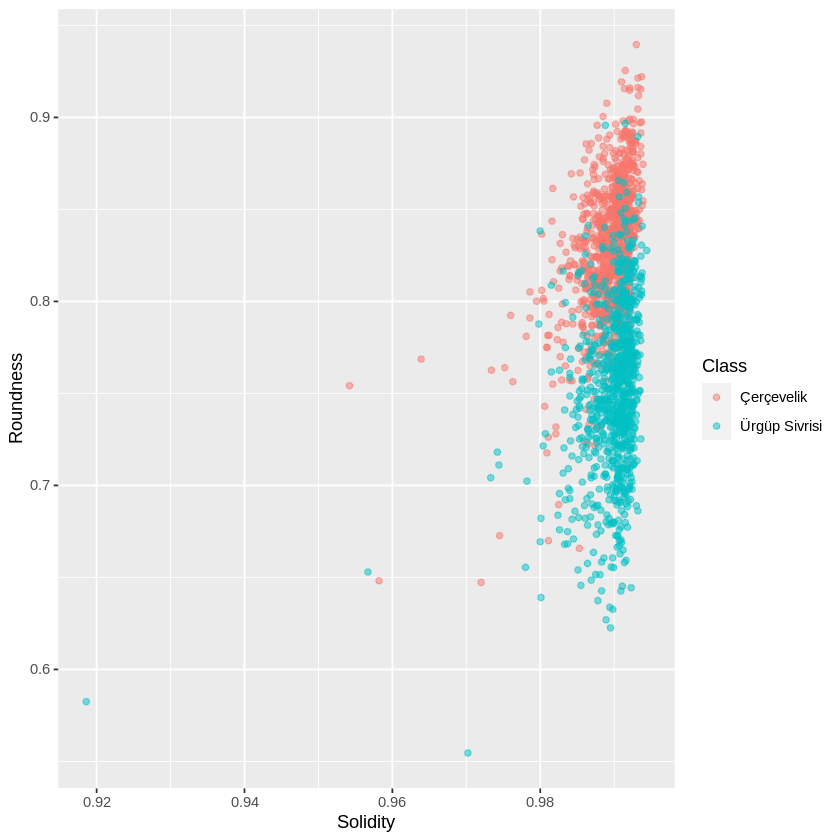

In [45]:
pumpkin_split <- initial_split(pumpkin_data, prop = 0.75, strata = Class)
pumpkin_train <- training(pumpkin_split)
pumpkin_test <- testing(pumpkin_split)

pumpkin_plot <- ggplot(pumpkin_train, aes(x = Solidity, y = Roundness, color = Class)) + geom_point(alpha = 0.5)
pumpkin_plot